CSCI-P556: Applied Machine Learning
Fall 2018
Assignment #2
---



## Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.

### Task 0: (3 points)

What is the difference between the two sets of train/validation sets? Write your answer here:

**Ans:** The major difference between the datasets lie in the distribution of yes's and no's in the Y (target feature). Following are the counts

**train 1**

no---->3384

yes--->3386

**valid 1**

no--->847

yes-->846

**train 2**

no--->25549

yes--->3386

**valid 2**

no--->6388

yes--->846

in Train 1 and Valid 2, there is an almost equal split whereas in Train2 and Valid2, there is a large disparity in the number of No's and Yes's with the No's being quite high.
Apart from this, there are more number of samples in train2 and valid 2 in comparison with train1 and valid1 respectively.

### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the follow steps:

1.  Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.
2. Find all categorical features and process them as was discussed in class. List those features and explain what you did.
3. Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.



Write your text-based answers here.

**1**.   Age, Balance, Duration,Campaign, Previous,Day and Pdays are continous numerical valus that were normalized.

**2**.   Default,Housing,Loan,Matital,Contact,Poutcome,Education,Job and Month are categorical features that were replaced with 1's and 0's if they have only two possible values and one-hot encoding was performed for more than two possible values.

**3**.   Pdays have missing values represented as -1. The mean of the available values were taken and all -1's were replaced with it. Later, normalization was done on all values.

In [67]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import   matplotlib.pyplot   as   plt 
from sklearn.metrics import accuracy_score
import numpy as np

def data_processsing(data_set):
#   Numerical continous values
    data_set['age']=(data_set['age']-data_set['age'].mean())/data_set['age'].std() 
    data_set['balance']=(data_set['balance']-data_set['balance'].mean())/data_set['balance'].std()
    #data_set['day']=(data_set['day']-data_set['day'].mean())/data_set['day'].std()
    data_set['duration']=(data_set['duration']-data_set['duration'].mean())/data_set['duration'].std()
    data_set['campaign']=(data_set['campaign']-data_set['campaign'].mean())/data_set['campaign'].std()
    data_set['previous']=(data_set['previous']-data_set['previous'].mean())/data_set['previous'].std()
    data_set['day']=(data_set['day']-data_set['day'].mean())/data_set['day'].std()
    
#   Categorical Values
    cat = pd.Categorical(data_set['default'])
    data_set['default']=data_set.default.astype("category").cat.codes
    cat = pd.Categorical(data_set['housing'])
    data_set['housing']=data_set.housing.astype("category").cat.codes
    cat = pd.Categorical(data_set['loan'])
    data_set['loan']=data_set.loan.astype("category").cat.codes
    cat = pd.Categorical(data_set['y'])
    data_set['y']=data_set.y.astype("category").cat.codes

#   One-hot Encoding
    data_set = pd.concat([data_set, pd.get_dummies(data_set['marital'], prefix='marital')], axis=1)
    data_set = pd.concat([data_set, pd.get_dummies(data_set['contact'], prefix='contact')], axis=1)
    data_set = pd.concat([data_set, pd.get_dummies(data_set['poutcome'], prefix='poutcome')], axis=1)
    data_set = pd.concat([data_set, pd.get_dummies(data_set['education'], prefix='education')], axis=1)
    data_set = pd.concat([data_set, pd.get_dummies(data_set['job'], prefix='job')], axis=1)
    data_set = pd.concat([data_set, pd.get_dummies(data_set['month'], prefix='month')], axis=1)
    
#   Replacing missing values in pdays
    count=0
    sum1=0
    for i in data_set['pdays']:
        if i!=-1:
            sum1=sum1+i
            count=count+1
    avg=float(sum1)/float(count)
    data_set.pdays = data_set.pdays.replace({-1:avg})
    data_set['pdays']=(data_set['pdays']-data_set['pdays'].mean())/data_set['pdays'].std()
    return data_set



train1 = pd.read_csv('train_1.csv')
valid1 = pd.read_csv('valid_1.csv')
train2 = pd.read_csv('train_2.csv')
valid2 = pd.read_csv('valid_2.csv')
test = pd.read_csv('test.csv')

train1=data_processsing(train1)
valid1=data_processsing(valid1)
train2=data_processsing(train2)
valid2=data_processsing(valid2)
test=data_processsing(test)

### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

Lambda 1.25
Accuracy of validation set for this lambda 0.8163024217365623
Lambda 1.3
Accuracy of validation set for this lambda 0.8168930891907856
Lambda 1.35
Accuracy of validation set for this lambda 0.8168930891907856
Lambda 1.4
Accuracy of validation set for this lambda 0.8168930891907856
Lambda 1.45
Accuracy of validation set for this lambda 0.8168930891907856
Lambda 1.5
Accuracy of validation set for this lambda 0.8168930891907856
Lambda 1.55
Accuracy of validation set for this lambda 0.8163024217365623
Lambda 1.6
Accuracy of validation set for this lambda 0.8163024217365623


For best lambda= 1.5 :
Accuracy of Train Set 0.8327670261486187
Accuracy of Validation Set 0.8163024217365623
Accuracy on Test Set:  0.7601459692579896


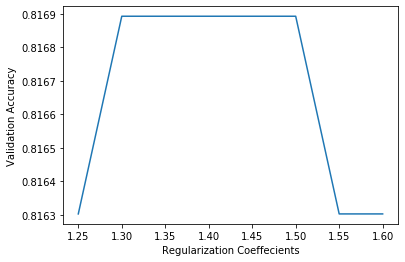

In [68]:
col=['age','job_admin.','job_blue-collar','job_services','job_unemployed','job_technician','job_management','job_unknown','job_housemaid','job_entrepreneur','job_retired','job_self-employed','job_student','default','balance','housing','loan','duration','campaign','pdays','previous','poutcome_failure','poutcome_other','poutcome_success','poutcome_unknown','marital_divorced','marital_married','marital_single','education_primary','education_secondary','education_tertiary','education_unknown','contact_cellular','contact_telephone','contact_unknown','day','month_apr','month_aug','month_dec','month_feb','month_jan','month_jul','month_jun','month_mar','month_may','month_nov','month_oct','month_sep']
X_train=train1[col] 
y_train=train1['y']
X_valid=valid1[col]
y_valid=valid1['y']
X_test=test[col]
y_test=test['y']

lmb = [1.25,1.3,1.35,1.40,1.45,1.50,1.55,1.6]
validation_accuracy=[]
most_accuracy=0

#To find optimal lambda
for c in lmb:
    lr_train = LogisticRegression(penalty='l2', C=1/float(c), solver='liblinear')
    lr_train.fit(X_train, y_train)
    accuracy=lr_train.score(X_valid, y_valid)
    validation_accuracy.append(accuracy)
    print("Lambda", c)
    print("Accuracy of validation set for this lambda", accuracy)
    if accuracy>=most_accuracy:
        most_accuracy=accuracy
        final_lmb=c


#Finding accuracy for train and test sets
lr_test = LogisticRegression(penalty='l2', C=1/float(final_lmb), solver='liblinear')
lr_test.fit(X_train, y_train)
accuracy_train=lr_test.score(X_train, y_train)
accuracy_test=lr_test.score(X_test, y_test)
 
print("\n\nFor best lambda= "+str(final_lmb)+" :")
print("Accuracy of Train Set", accuracy_train)
print("Accuracy of Validation Set",accuracy) 
print("Accuracy on Test Set: ",accuracy_test)   

plt.plot(lmb,validation_accuracy)
plt.xlabel('Regularization Coeffecients')
plt.ylabel('Validation Accuracy')
plt.show()

### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

Lambda 0.1
Accuracy of validation set for this lambda 0.900331766657451
Lambda 0.2
Accuracy of validation set for this lambda 0.900331766657451
Lambda 0.3
Accuracy of validation set for this lambda 0.900331766657451
Lambda 0.4
Accuracy of validation set for this lambda 0.900331766657451
Lambda 0.5
Accuracy of validation set for this lambda 0.9004700027647221
Lambda 0.6
Accuracy of validation set for this lambda 0.9004700027647221
Lambda 0.7
Accuracy of validation set for this lambda 0.9004700027647221
Lambda 0.8
Accuracy of validation set for this lambda 0.900331766657451
Lambda 0.9
Accuracy of validation set for this lambda 0.900331766657451
Lambda 1
Accuracy of validation set for this lambda 0.900331766657451


For best lambda= 0.7 :
Accuracy on Train Set 0.9023985622451096
Accuracy on Validation Set: 0.900331766657451
Accuracy on Test Set:  0.9018024991706293


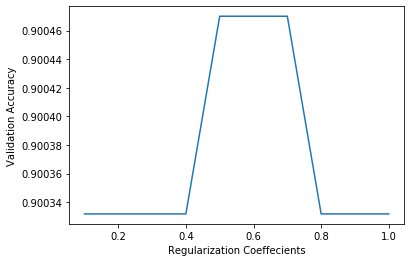

In [69]:
X_train=train2[col]
y_train=train2['y']
X_valid=valid2[col]
y_valid=valid2['y']
most_accuracy=0
lmb=[0.1,0.20,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
validation_accuracy=[]

#To find optimal lambda
for c in lmb:
    clf = LogisticRegression(penalty='l2', C=1/float(c),solver='liblinear')
    clf.fit(X_train, y_train)
    #print('Coefficients: ', clf.coef_)
    accuracy=clf.score(X_valid, y_valid)
    validation_accuracy.append(accuracy)
    print("Lambda", c)
    print("Accuracy of validation set for this lambda", accuracy)
    if accuracy>=most_accuracy:
        most_accuracy=accuracy
        final_lmb=c
        
#Finding accuracy for train and test sets
lr_test = LogisticRegression(penalty='l2', C=1/float(final_lmb), solver='liblinear')
lr_test.fit(X_train, y_train)
accuracy_train=lr_test.score(X_train, y_train)
accuracy_test=lr_test.score(X_test, y_test)    

print("\n\nFor best lambda= "+str(final_lmb)+" :")
print("Accuracy on Train Set", accuracy_train)
print("Accuracy on Validation Set:", accuracy)
print("Accuracy on Test Set: ",accuracy_test)

plt.plot(lmb,validation_accuracy)
plt.xlabel('Regularization Coeffecients')
plt.ylabel('Validation Accuracy')
plt.show()

### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

Threshold=  0.1
Accuracy of validation set for this threshold= 0.8871993364666851
Threshold=  0.2
Accuracy of validation set for this threshold= 0.8928670168648051
Threshold=  0.3
Accuracy of validation set for this threshold= 0.8963229195465856
Threshold=  0.4
Accuracy of validation set for this threshold= 0.8992258777992812
Threshold=  0.5
Accuracy of validation set for this threshold= 0.9004700027647221
Threshold=  0.6
Accuracy of validation set for this threshold= 0.9032347249101466
Threshold=  0.7
Accuracy of validation set for this threshold= 0.9012994194083495


For best threshold= 0.6 :
Accuracy on Train Set:  0.9033317204672704
Accuracy on Validation Set:  0.9032347249101466
Accuracy on Test Set:  0.9043459029083268


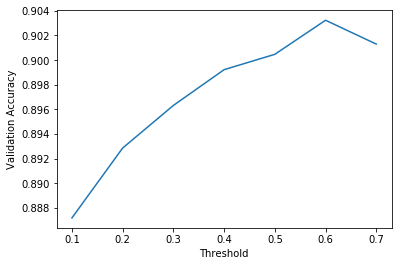

In [70]:
p=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
validation_accuracy_threshold=[]
most_accurate=0

lr_train = LogisticRegression(penalty='l2', C=1/float(final_lmb), solver='liblinear')
lr_train.fit(X_train, y_train)

#To find optimal threshold
for i in p:
    y_predicted = pd.DataFrame(lr_train.predict_proba(X_valid))
    y_predicted=y_predicted[0]
    y_valid_pred=[]
    for j in y_predicted:
        if (j>=i):
            y_valid_pred.append(0) 
        else:
            y_valid_pred.append(1)
    accuracy = accuracy_score(y_valid,y_valid_pred)
    print("Threshold= ",i)
    print("Accuracy of validation set for this threshold=",accuracy)
    validation_accuracy_threshold.append(accuracy)
    if accuracy >= most_accurate:
        most_accurate = accuracy
        final_p=i 
      
#Accuracies for train and test
y_test_pred=np.where(lr_train.predict_proba(X_test)>final_p, 1,0)
y_test_pred_final=[]
for i in range(0,len(y_test_pred)):
    if y_test_pred[i][0]==1:
        y_test_pred_final.append(0)
    else:
        y_test_pred_final.append(1)
accuracy = accuracy_score(y_test,y_test_pred_final)

    
y_test_pred=np.where(lr_train.predict_proba(X_train)>final_p, 1,0)
y_test_pred_final=[]
for i in range(0,len(y_test_pred)):
    if y_test_pred[i][0]==1:
        y_test_pred_final.append(0)
    else:
        y_test_pred_final.append(1)
accuracy_train = accuracy_score(y_train,y_test_pred_final)

print("\n\nFor best threshold= "+str(final_p)+" :")
print("Accuracy on Train Set: ",accuracy_train)
print("Accuracy on Validation Set: ", most_accurate) 
print("Accuracy on Test Set: ",accuracy)
    
plt.plot(p,validation_accuracy_threshold)
plt.xlabel('Threshold')
plt.ylabel('Validation Accuracy')
plt.show()

### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent.
2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.

**Answers**

**1**.The best performance is for model C, then model B and finally model A. This can be explained when we take a look at the test set. The number of no's and yes's are as below:

no--->7985

yes--->1058


This is very similar to the distribution of no's in train 2 and valid 2 which we work on for models B and C. The model is trained to say 'no' more often than not. Since the test also has more number of no's, the accuracy obtained will be high but is misleading because the yes's will be predicted as no's as well but since the number of yes's are much lesser, it will not have a huge impact on the accuracy. 

Model A however is trained on train 1 which has an almost even split in the number of yes and no's. And since test set has an imbalanced target column, the accuracy is lowest out of all three cases.

**2**.For the results we can conclude that accuracy alone may be misleading. We will also have to observe the target set trend. If the target column in test set was evenly distributed. model A's accuracywould have been the best out of the three.

Being a binary classification model, we can use F1-score metric to judge the three models.

## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

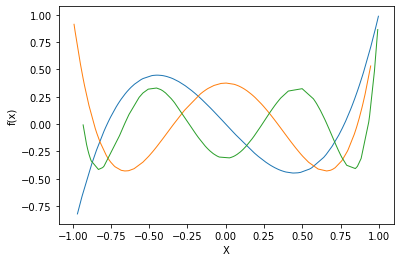

In [71]:
import numpy as np
from scipy.special import legendre
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import pandas as pd
import tabulate

def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
    w = get_coefficients(degree)
    X=np.sort(np.random.uniform(float(low), float(high), size=100))
    Y_list=[]
    for j in X:
        fofx=w[0]
        d=1
        for i in range(1,len(w)):
            fofx=fofx+((j**d)*w[i]) 
            d=d+1 
        Y_list.append(fofx) 
    
    df=pd.DataFrame({'X':X,'FOFX':Y_list})
    plt.plot('X','FOFX',data=df,markersize=6,linewidth=1)
    plt.xlabel('X')
    plt.ylabel('f(x)')
    
    return(X,Y_list)

## TEST CASES (The following lines should plot a function)
visualize_function(3, -1, 1)
visualize_function(4, -1, 1)
visualize_function(6, -1, 1)
plt.show()  

### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [72]:
def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples
    - n_test - Number of test samples
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
    """
    y_train=[]
    w = get_coefficients(degree)
    X_train=np.sort(np.random.uniform(float(-1), float(1), size=n_train))
    for j in range (0,len(X_train)):
        fofx=w[0]
        d=1
        for i in range(1,len(w)):
            fofx=fofx+((X_train[j]**d)*w[i]) 
            d=d+1   
        
        fofx=fofx+np.random.normal(loc=0.0, scale=sigma)
        y_train.append(fofx)
        
    y_test=[]
    X_test=np.sort(np.random.uniform(float(-1), float(1), size=n_test))
    for j in range (0,len(X_test)):
        fofx=w[0]
        d=1
        for i in range(1,len(w)):
            fofx=fofx+((X_test[j]**d)*w[i]) 
            d=d+1 
        fofx=fofx+np.random.normal(loc=0.0, scale=sigma)
        y_test.append(fofx)
    
    return X_train, y_train, X_test, y_test

### Task 3 (20 points)

1.   Use the function written in Task 2 to generate a dataset of degree $10$, with $20$ samples each in the training and test sets. The standard deviation of the noise should be $0.2$.
2.   Plot the generated points of the train set over the function. Make use the function you wrote in Task 1 to do so. The resultant plot should not only contain the function in blue color but also the generated points in the train set in red color.
3.   Fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ should be quadratic and Model $\mathcal{B}$ should be of degree $10$. How would you create such models?
4. Calculate the training error and testing error on both these models and report them nicely in a table.
5. Explain the results:

 **- Are the results as expected or surprising? Explain your stance.**
 
   **Ans**.Since the degree of the data sets are 10, one would expect the error for degree 10 polynomial regression model to be much lesser than that of degree 2. However, the results showed that the error across train and data sets for both 2 and 10 degrees do not vary much.
 
 **- Give a detailed explanation of why this happens.**
 
   **Ans**.This may be due to the fact that noise has been added to the data set. The data points are scattered around  function curve because of noise. To confirm this, I generated another data set for same degrees but this time with no noise. This is depicted below. This time, the points were fitted well on the curve. And the error for degree 10 polynomial model was much much lesser. From this we can conclude that when noise is added, and here, it is added to every sample, it can affect the accuracy.
 
 **Hint**: You are free (in fact encouraged) to design new experiments under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

 
Note: _There is no preference over the size of the answer but please note that you shouldn't write anything that is not pertinent. While being terse, your answer should clearly convey the intuition. Also, use logical number code/text cells---i.e. every subquestion in a given task which can be considered a logical unit should be present in one cell. Do not make one cell unnecessarily long by putting multiple answers in it or split a given answer over multiple cells. Use your best judgement.

PLOT AND ERROR VALUES FOR DATA WITH NOISE


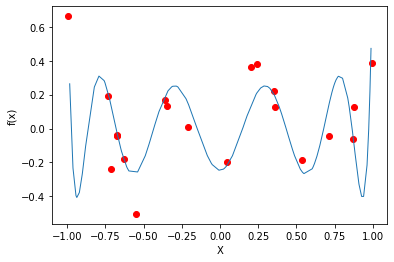

------------------------------------------
Data Set  Degree    Error     
------------------------------------------
Train     2         0.25360108150581984
Test      2         0.3678639684398232
Train     10        0.10473661982914942
Test      10        0.28384998952297014


PLOT AND ERROR VALUES FOR DATA WITH NO NOISE


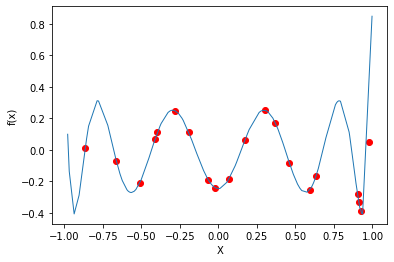

------------------------------------------
Data Set  Degree    Error     
------------------------------------------
Train     2         0.1673962339756037
Test      2         0.19499207876969654
Train     10        3.0130758008190834e-14
Test      10        4.423589879415941e-14


In [74]:
def polynomial_regression(d,Xtr,ytr,Xte,yte):  
    Xtr=np.asarray(Xtr)
    ytr=np.asarray(ytr)
    Xtr = Xtr[:, np.newaxis]
    ytr = ytr[:, np.newaxis]
    
    Xte=np.asarray(Xte)
    yte=np.asarray(yte)
    Xte = Xte[:, np.newaxis]
    yte = yte[:, np.newaxis]
    
    polynomial_regression = PolynomialFeatures(degree=d)
    Xtr_poly = polynomial_regression.fit_transform(Xtr)
    clf = linear_model.LinearRegression()
    clf.fit(Xtr_poly, ytr)
    y_predict=clf.predict(Xtr_poly)  
    rmse_train = np.sqrt(mean_squared_error(ytr,y_predict))

    Xte_poly = polynomial_regression.fit_transform(Xte)
    y_predict=clf.predict(Xte_poly)
    rmse_test = np.sqrt(mean_squared_error(yte,y_predict))

    return(rmse_train,rmse_test)


(X_train, y_train, X_test, y_test)=generate_dataset(10, 20, 20, 0.2)
plt.plot(X_train,y_train,'ro')
visualize_function(10, -1, 1)

print("PLOT AND ERROR VALUES FOR DATA WITH NOISE")
plt.show()

#Fitting Model
(rmse_train_1,rmse_test_1)=polynomial_regression(2,X_train,y_train,X_test, y_test)
(rmse_train_2,rmse_test_2)=polynomial_regression(10,X_train,y_train,X_test,y_test)

#Printing Table
table=[['Data Set','Degree','Error']]
table.append(['Train',2,rmse_train_1])
table.append(['Test',2,rmse_test_1])
table.append(['Train',10,rmse_train_2])
table.append(['Test',10,rmse_test_2])
dash='-'*42
for i in range(len(table)):
    if i == 0:
      print(dash)
      print('{: <10}{: <10}{: <10}'.format(table[i][0],table[i][1],table[i][2]))
      print(dash)
    else:
      print('{: <10}{: <10}{: <10}'.format(table[i][0],table[i][1],table[i][2]))
    
print("\n\nPLOT AND ERROR VALUES FOR DATA WITH NO NOISE")
(X_train, y_train, X_test, y_test)=generate_dataset(10, 20, 20, 0.0)
plt.plot(X_train,y_train,'ro')
visualize_function(10, -1, 1)
plt.show()
(rmse_train_1,rmse_test_1)=polynomial_regression(2,X_train,y_train,X_test, y_test)
(rmse_train_2,rmse_test_2)=polynomial_regression(10,X_train,y_train,X_test,y_test)

table=[['Data Set','Degree','Error']]
table.append(['Train',2,rmse_train_1])
table.append(['Test',2,rmse_test_1])
table.append(['Train',10,rmse_train_2])
table.append(['Test',10,rmse_test_2])
dash='-'*42
for i in range(len(table)):
    if i == 0:
      print(dash)
      print('{: <10}{: <10}{: <10}'.format(table[i][0],table[i][1],table[i][2]))
      print(dash)
    else:
      print('{: <10}{: <10}{: <10}'.format(table[i][0],table[i][1],table[i][2]))    

### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.
**3.  This target doesn't have noise like the previous one. Does this make the result surprising? Explain your stance. Also give a detailed explanation of why this happens.**


**Ans**.It is surprising at first glance when we observe that despite having no noise, the error here is higher than the previous question which was noisy. However, when we have a closer look at the the dataset and see that it is a 45 degree dataset but the linear regression model is of only degrees 2 or 10 whh led me o believe it to be a serious case of underfitting. But, upon further observation I saw a large difference in error between train and test data for polynomial of degree 10. A sample value that was obtained is shown below.
   
Train     15.656004114455998


Test      1389.0605227341268


A large difference in rmse means that we are over-fitting the model or a polynomial of degree 10.

**Hint**: You are free (in fact encouraged) to design new experiements under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

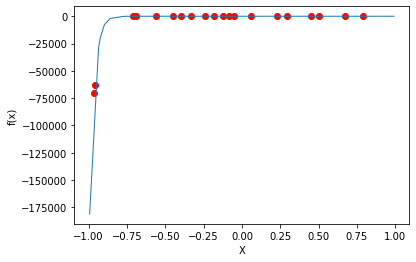

------------------------------------------
Data Set  Degree    Error     
------------------------------------------
Train     2         11546.330845893019
Test      2         24643.74990697611
Train     10        308.44926070723193
Test      10        4942.197598255342


In [60]:
(X_train, y_train, X_test, y_test)=generate_dataset(45, 20, 20, 0.0)
plt.plot(X_train,y_train,'ro')
visualize_function(45, -1, 1)
plt.show()

(rmse_train_1,rmse_test_1)=polynomial_regression(2,X_train,y_train,X_test, y_test)
(rmse_train_2,rmse_test_2)=polynomial_regression(10,X_train,y_train,X_test, y_test)

table=[['Data Set','Degree','Error']]
table.append(['Train',2,rmse_train_1])
table.append(['Test',2,rmse_test_1])
table.append(['Train',10,rmse_train_2])
table.append(['Test',10,rmse_test_2])
for i in range(len(table)):
    if i == 0:
      print(dash)
      print('{: <10}{: <10}{: <10}'.format(table[i][0],table[i][1],table[i][2]))
      print(dash)
    else:
      print('{: <10}{: <10}{: <10}'.format(table[i][0],table[i][1],table[i][2]))